## Logistic Regression Project

#### Goal : Create a classification model to predict whether a person has heart disease or not based on that person's physical features

## Data
    This dataset contains 14 physical attributes based on physical testing of a patient.
### Attributes/Columns :
* age  
* sex        --> 1=Male; 0=Female
* cp         --> Chest Pain Type(0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)
* trestbps   --> Resting Blood Pressure
* chol       --> serum cholestoral in mg/dl
* fbs        --> fasting blood sugar
* restecg    --> resting electrocardiographic results (values 0,1,2)
* thalach    --> maximum heart rate achieved
* exang      --> exercise induced angina(1 = Yes; 0 = No)
* oldpeak    --> ST depression induced by exercise relative to rest
* slope      --> the slope of the peak exercise ST segment
* ca         --> number of major vessels (0-3) colored by flourosopy
* thal       --> 3 = normal; 6 = fixed defect; 7 = reversable defect
* target     --> 0 for no presence of heart disease; 1 for presence of heart disease


### Steps followed:
    1. Understanding our dataset by Exploratory Data Analysis
    2. Splitting and Preprocessing the data
    3. Creating LogisticRegressionCV(Cross Validation) model
    4. Getting an overview about Classification Metrics
    5. Creating GridSearchCV model
    6. Comparing Metrics

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Checking for NULL values in dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no NULL values in dataset

### Exploring all columns individually

#### Exploring 'age' column

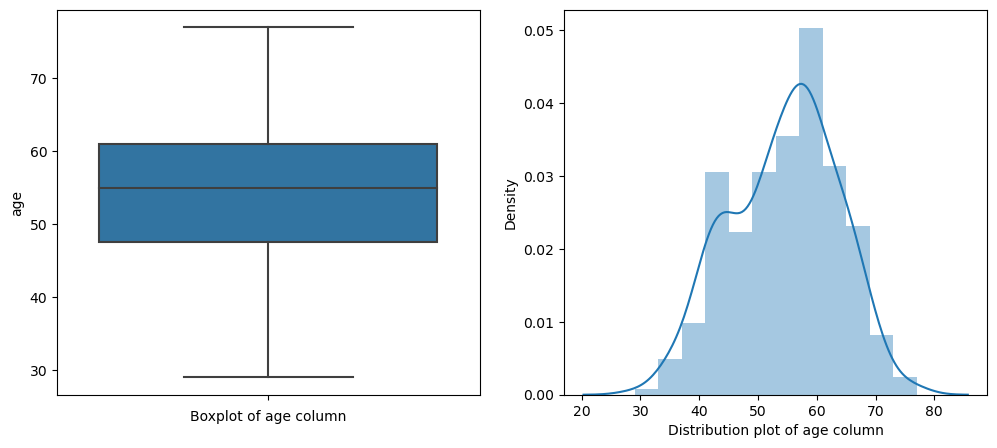

In [9]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.boxplot(data=df,y='age',ax=ax[0])
ax[0].set_xlabel('Boxplot of age column')

sns.distplot(df['age'],ax=ax[1])
ax[1].set_xlabel('Distribution plot of age column')

plt.show()

From above plots,We can say that
* There are no outliers in age column
* Most of the patient's ages are roughly in between 45 to 65 

#### Exploring 'sex' column

In [10]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

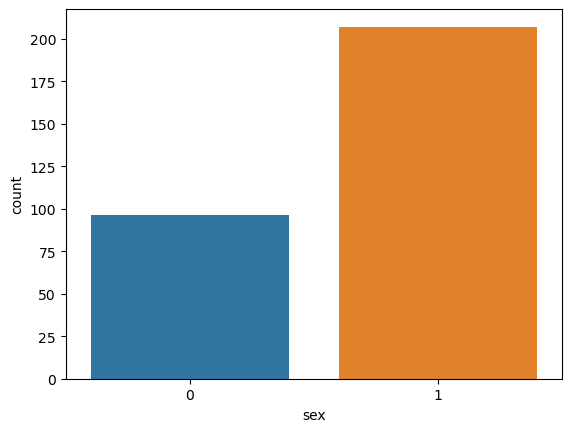

In [11]:
sns.countplot(data=df,x='sex')
plt.show()

From above output,We can say that
* Dataset contains records of 207 Male patient's and 96 Female patinet's

#### Countplot of 'cp' column

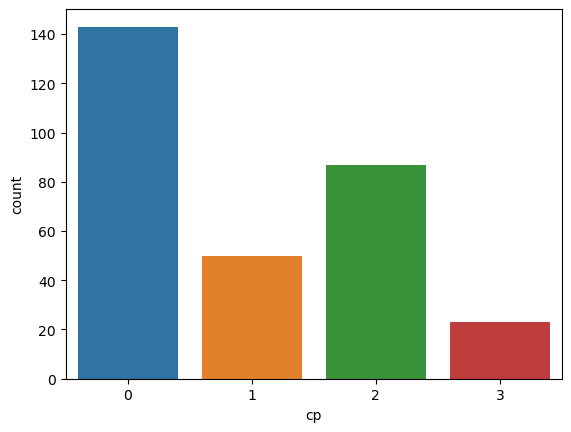

In [12]:
sns.countplot(data=df,x='cp')
plt.show()

From above output,We can say that,
* Patient's having 'typical angina pain' are more,following 'non-anginal pain'

#### Exploring 'trestbps' column
* This column contains level of blood pressure of the patient
* Normal blood pressure is in between 120/80 mmHg

In [13]:
print("Number of patient's whose blood pressure is greater than 120mmHg :",len(df[df['trestbps']>120]))
print("Number of patient's whose blood pressure is less than 80mmHg :",len(df[df['trestbps']<80]))
print("Number of patient's whose blood pressure is normal :",len(df.loc[(df['trestbps']<=120) & (df['trestbps']>=80)]))

Number of patient's whose blood pressure is greater than 120mmHg : 206
Number of patient's whose blood pressure is less than 80mmHg : 0
Number of patient's whose blood pressure is normal : 97


#### Exploring 'chol' column
* Serum cholestrol level represents the amount of total cholestrol in blood
* Normal range is less than 200 mg/dl
* High,when level is more than 240 mg/dl

In [14]:
print("Number of patient's whose cholestrol level is greater than 120mg/dl :",len(df[df['chol']>200]))
print("Number of patient's whose cholestrol level is less than 120mg/dl :",len(df[df['chol']<=200]))

Number of patient's whose cholestrol level is greater than 120mg/dl : 252
Number of patient's whose cholestrol level is less than 120mg/dl : 51


#### Exploring 'thalach' column
* This column represents maximum heart beat rate of the patient 

In [15]:
df.nlargest(10,columns='thalach')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1


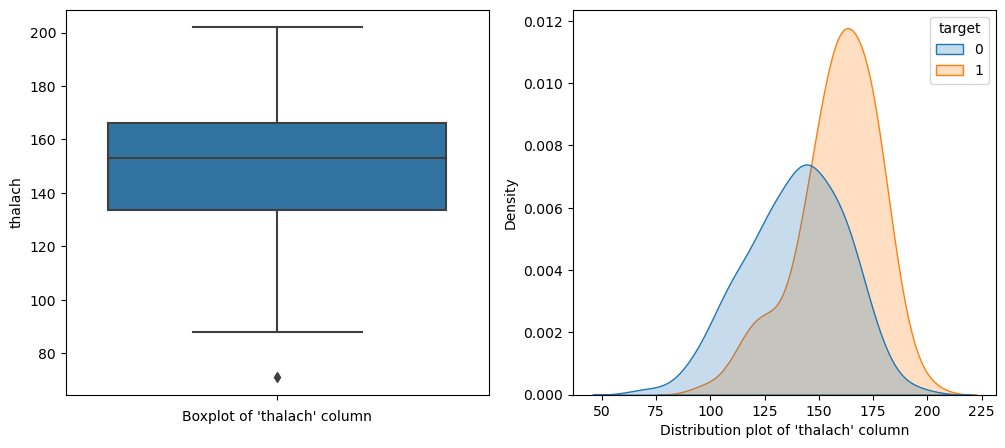

In [16]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.boxplot(data=df,y='thalach',ax=ax[0])
ax[0].set_xlabel("Boxplot of 'thalach' column")

sns.kdeplot(data=df,x='thalach',hue='target',ax=ax[1],shade=True)
ax[1].set_xlabel("Distribution plot of 'thalach' column")

plt.show()

From above output,We can say that,
* There is one outlier in the column
* Most of the patient's heart beat is in range 130 to 185

### Exploring Target column
* 1 --> Has Heart disease
* 0 --> No Heart disease

In [17]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

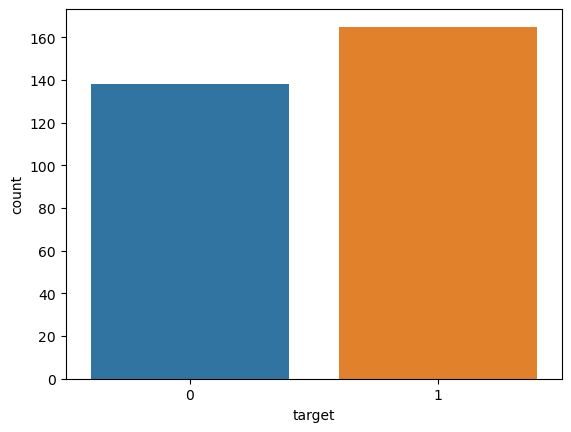

In [18]:
sns.countplot(x='target',data=df)
plt.show()

From above output,We can say that,
* our dataset is somewhat balanced

#### Countplot of 'ca' and 'thal' columns with 'target' as hue

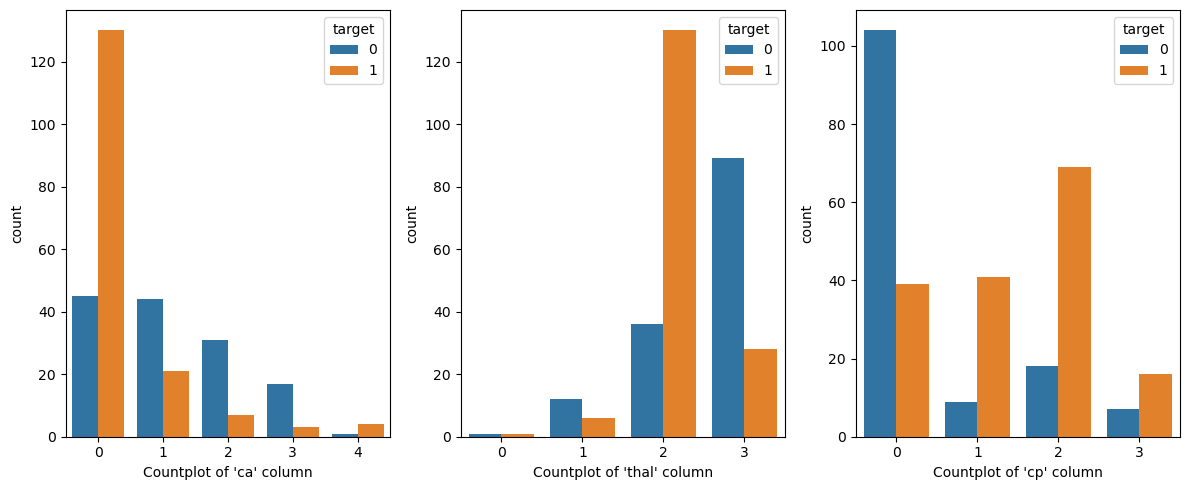

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
sns.countplot(data=df,x='ca',hue='target',ax=ax[0])
ax[0].set_xlabel("Countplot of 'ca' column")

sns.countplot(data=df,x='thal',hue='target',ax=ax[1])
ax[1].set_xlabel("Countplot of 'thal' column")

sns.countplot(x='cp',hue='target',data=df,ax=ax[2])
ax[2].set_xlabel("Countplot of 'cp' column")

plt.tight_layout()

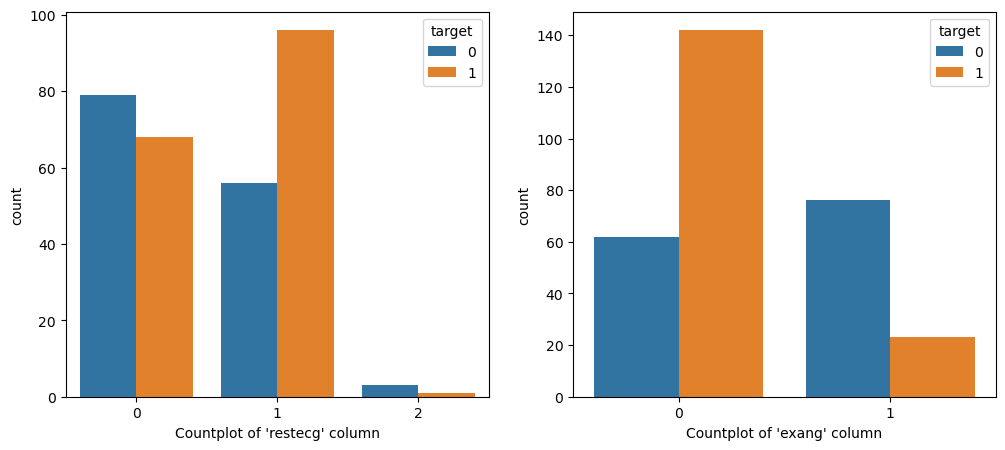

In [20]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=df,x='restecg',hue='target',ax=ax[0])
ax[0].set_xlabel("Countplot of 'restecg' column")

sns.countplot(data=df,x='exang',hue='target',ax=ax[1])
ax[1].set_xlabel("Countplot of 'exang' column")

plt.show()

### Correlation between the features

<AxesSubplot:>

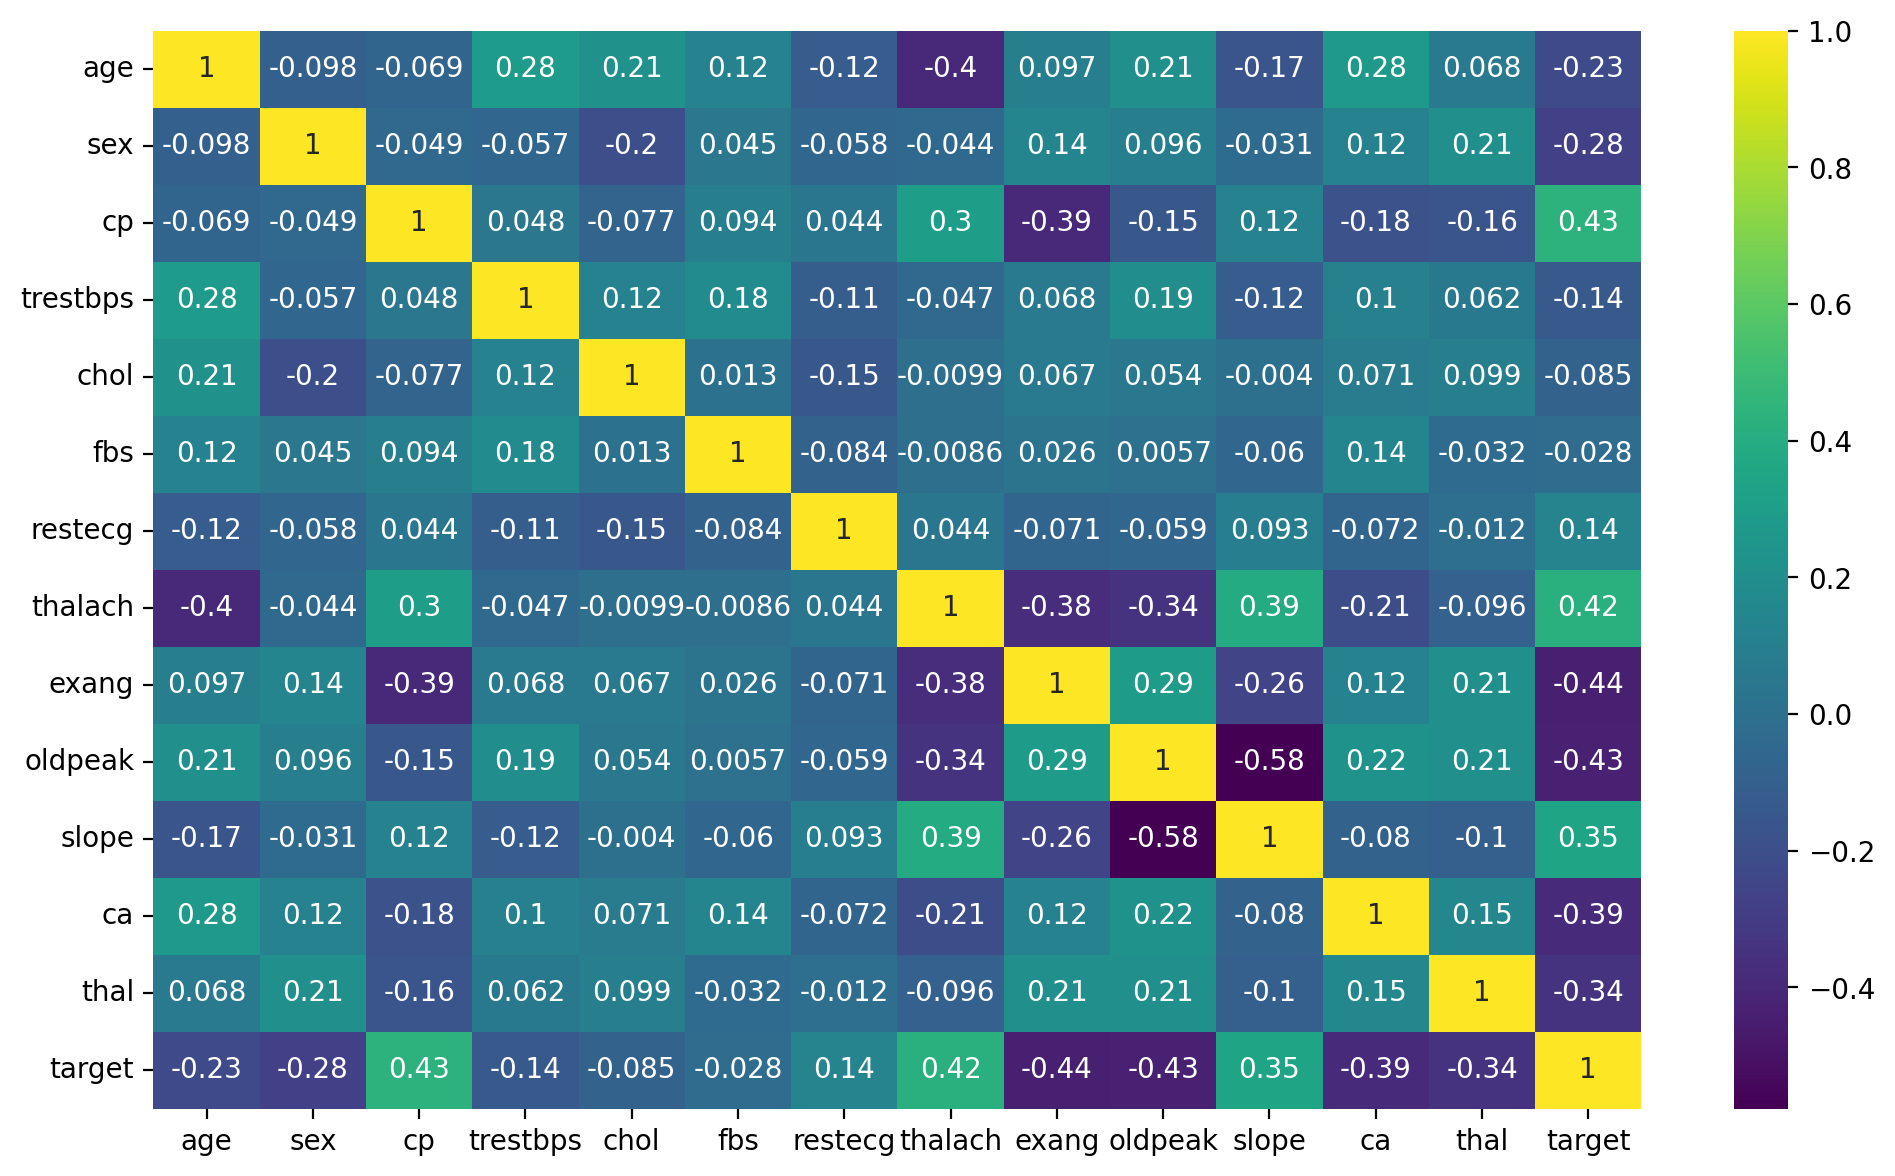

In [21]:
plt.figure(figsize=(12,7),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

From above output,We can say,
* Target column is high positively correlated with 'cp','thalach','slope' columns
* Target column is high negatively correlated with 'exang','oldpeak','ca','thal' columns

### Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('target',axis=1)

In [24]:
y = df['target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

In [26]:
X_train.shape

(227, 13)

In [27]:
X_test.shape

(76, 13)

### Scaling the train and test data

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler() 

In [30]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression

* First,We create a Logistic Regression Cross Validation model
* Second,We use GridSearchCV for finding out the best logistic regression parameters and use those best parameters for classification
* We do check the classification metrics in both cases

## Classification Metrics

**Accuracy Score :** 
   * It is the fraction of predictions our model got right
   * It is ratio of Number of correct predictions to Total number of predictions
   * For Multi-Class classification,accuracy score may not be a good metric to consider 
   
**Confusion Matrix :** This represents below defined 4 cases in a matrix form
   * True Positive : A case in which,observation is predicted positive and is actually positive
   * True Negative : A case in which,observation is predicted negative and is actually negative
   * False Positive : A case in which,observation is predicted positive but is actually negative
   * False Negative : A case in which,observation is predicted negative but is actually positive 
    
**Classification Report :**
   * Precision : This quantifies the number of correct positive predictions made
   * Recall : This quantifies the number of correct positive predictions made out of all positive predictions that could have been made
   * f1-score : This measures a model's accuracy.It is harmonic mean of a precision and recall values
   * Support : Number of actual occurrences of the class in the specified dataset.

### LogisticRegressionCV

In [31]:
from sklearn.linear_model import LogisticRegressionCV

In [32]:
log_CV_model = LogisticRegressionCV(Cs=10,cv=5,penalty='l2',solver='lbfgs',max_iter=50,multi_class='ovr',random_state=31)

In [33]:
# Fitting the model
log_CV_model.fit(scaled_X_train,y_train)

LogisticRegressionCV(cv=5, max_iter=50, multi_class='ovr', random_state=31)

In [34]:
log_CV_model.scores_

{1: array([[0.56521739, 0.56521739, 0.76086957, 0.84782609, 0.73913043,
         0.7173913 , 0.7173913 , 0.7173913 , 0.7173913 , 0.7173913 ],
        [0.56521739, 0.56521739, 0.80434783, 0.82608696, 0.80434783,
         0.80434783, 0.80434783, 0.80434783, 0.80434783, 0.80434783],
        [0.57777778, 0.6       , 0.73333333, 0.77777778, 0.8       ,
         0.8       , 0.8       , 0.8       , 0.8       , 0.8       ],
        [0.57777778, 0.57777778, 0.86666667, 0.82222222, 0.8       ,
         0.82222222, 0.82222222, 0.82222222, 0.82222222, 0.82222222],
        [0.57777778, 0.57777778, 0.75555556, 0.82222222, 0.77777778,
         0.77777778, 0.77777778, 0.77777778, 0.77777778, 0.77777778]])}

In [35]:
# Co-efficients of the model
log_CV_model.coef_

array([[-0.08103313, -0.35894742,  0.50309034, -0.22945463, -0.13906766,
         0.02440785,  0.19767517,  0.26069464, -0.22106015, -0.29577424,
         0.22115655, -0.39369269, -0.35886537]])

In [36]:
# Making predictions on X_test
log_CV_pred = log_CV_model.predict(scaled_X_test)

In [37]:
# Comparing predictions with y_test by using accuracy_score
from sklearn.metrics import accuracy_score
print('\033[1m'+'Accuracy score for y_test and predictions :'+'\033[0m',accuracy_score(y_test,log_CV_pred))

Accuracy score for y_test and predictions : 0.881578947368421


### Confusion Matrix

General form of Confusion Matrix


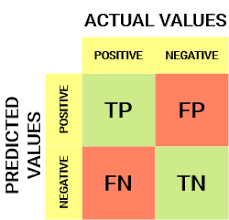

In [38]:
print('\033[1m'+'General form of Confusion Matrix')
Image('../Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/Images/confusion_matrix.jpeg.png',width=250)

In [39]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [40]:
confusion_matrix(y_test,log_CV_pred)

array([[34,  7],
       [ 2, 33]])

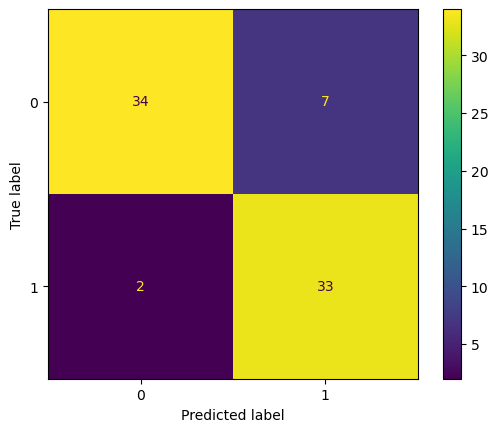

In [41]:
plot_confusion_matrix(log_CV_model,scaled_X_test,y_test)

From above output,We can say that
* Our test size is 76,among that log_CV_model did predict
   * 67 correct predictions
   * 9 incorrect predictions
   

### Classification Report

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,log_CV_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        41
           1       0.82      0.94      0.88        35

    accuracy                           0.88        76
   macro avg       0.88      0.89      0.88        76
weighted avg       0.89      0.88      0.88        76



### Precision Recall Curve(PR Curve)
* This curve shows the trade-off between precision and recall for different threshold.
* High area under  the curve represents both high recall and high precision.
* High precision relates to Low False Positive rate and high recall relates to Low False Negative rate

General Precision-Recall Curve


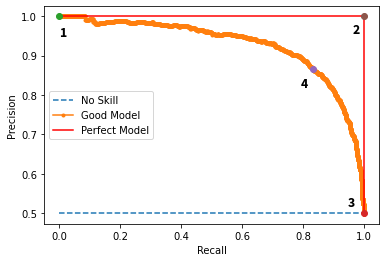

In [44]:
print('\033[1m'+'General Precision-Recall Curve')
Image('../Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/Images/precision_recall_curve.jpeg.png',width=500)

Above image shows a general precision-recall curve,
* on that curve each point corresponds to a different threshold, and its location corresponds to the resulting Precision and Recall when we choose that threshold.
   * Point 1 corresponds to the threshold of 1
   * Point 3 corresponds to the threshold of 0
   * Point 4 corresponds to the threshold somewhere in the range (0, 1)
   * Point 2 corresponds to a Perfect model
* Area under PR curve is used to compare two PR curves,higher the AUC better the performance   

In [45]:
from sklearn.metrics import plot_precision_recall_curve

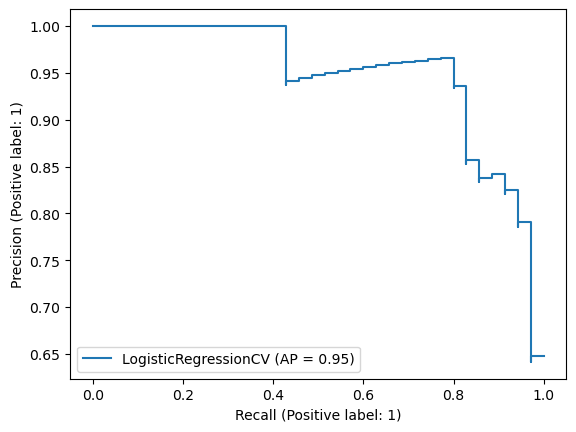

In [46]:
plot_precision_recall_curve(log_CV_model,scaled_X_test,y_test)

### ROC Curve(Reciever Operator Curve)
* In ROC curves,the true positive rate (TPR, y-axis) is plotted against the false positive rate (FPR, x-axis).
     * TPR = (True Postives)/(True Positives + False Negatives)
     * FPR = (False Positives)/(False Positives + True Negatives)
* Area Under the ROC Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.
* The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes.

General ROC Curve


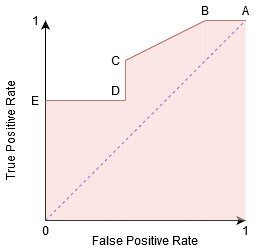

In [47]:
print('\033[1m'+'General ROC Curve')
Image('../Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/Images/ROC_AUC.jpeg',width=450)

**Sensitivity/True Positive Rate** tells us what proportion of the positive class got correctly classified. \
**Specificity/True Negative Rate** tells us what proportion of the negative class got correctly classified.

Above image shows,a general ROC curve,in that
* At Point A --> Sensitivity is the highest and Specificity the lowest. This means all the Positive class points are classified correctly, and all the Negative class points are classified incorrectly.
* Point B --> It has the same Sensitivity as Point A, it has a higher Specificity. Meaning the number of incorrectly Negative class points is lower than the previous threshold. This indicates that this threshold is better than the previous one.
* In between points C and D --> the Sensitivity at point C is higher than point D for the same Specificity. This means, for the same number of incorrectly classified Negative class points, the classifier predicted a higher number of Positive class points. Therefore, the threshold at point C is better than point D.
* At Point E --> the Specificity becomes highest. Meaning the model classifies no False Positives. The model can correctly classify all the Negative class points

In [48]:
import scikitplot as skplt

In [49]:
probs1 = log_CV_model.predict_proba(scaled_X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

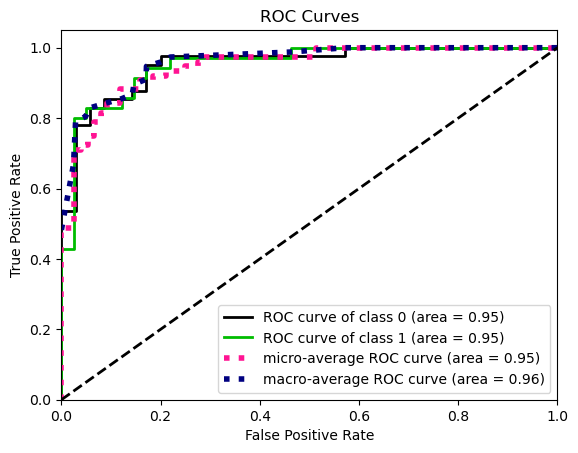

In [50]:
skplt.metrics.plot_roc_curve(y_test,probs1)

### GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [52]:
parameter_grid = {'penalty':['l1','l2','elasticnet','none'],
                  'C':[-3,-1,0,0.1,1,5,10,30],
                  'max_iter':[50,100,150,200],
                  'l1_ratio':[0,0.1,0.25,0.5,0.75,0.9],
                  'solver':['lbfgs','liblinear','newton-cg','sag','saga']
                 }
grid_model = GridSearchCV(LogisticRegression(warm_start=True),param_grid=parameter_grid,scoring='accuracy',cv=5)

In [53]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(warm_start=True),
             param_grid={'C': [-3, -1, 0, 0.1, 1, 5, 10, 30],
                         'l1_ratio': [0, 0.1, 0.25, 0.5, 0.75, 0.9],
                         'max_iter': [50, 100, 150, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [54]:
# Getting the best parameters 
grid_model.best_params_

{'C': 0.1, 'l1_ratio': 0, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}

In [55]:
# Creating LogisticRegression model with those best parameters
log_grid_model = LogisticRegression(C=0.1,l1_ratio=0,max_iter=50,penalty='l2',solver='lbfgs',warm_start=True)

In [56]:
# Fitting the model
log_grid_model.fit(scaled_X_train,y_train)

LogisticRegression(C=0.1, l1_ratio=0, max_iter=50, warm_start=True)

In [57]:
# Making predictions for X_test
log_grid_pred = log_grid_model.predict(scaled_X_test)

In [58]:
print('\033[1m'+'Accuracy score for y_test and predictions :'+'\033[0m',accuracy_score(y_test,log_grid_pred))

Accuracy score for y_test and predictions : 0.868421052631579


### Classification Matrix

In [59]:
confusion_matrix(y_test,log_grid_pred)

array([[34,  7],
       [ 3, 32]])

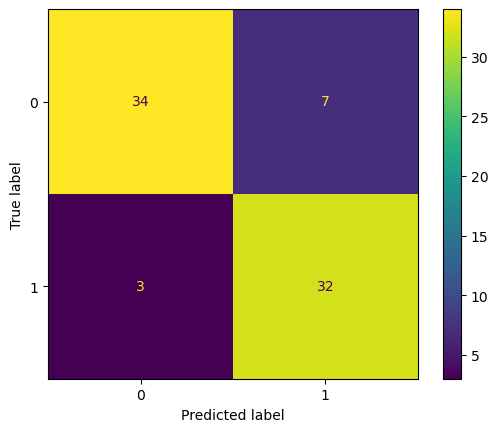

In [60]:
plot_confusion_matrix(log_grid_model,scaled_X_test,y_test)

From output,We can say that
* Our test size is 76,among that log_CV_model did predict
   * 66 correct predictions
   * 10 incorrect predictions

### Classification Report

In [61]:
print(classification_report(y_test,log_grid_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        41
           1       0.82      0.91      0.86        35

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



### Precision Recall Curve

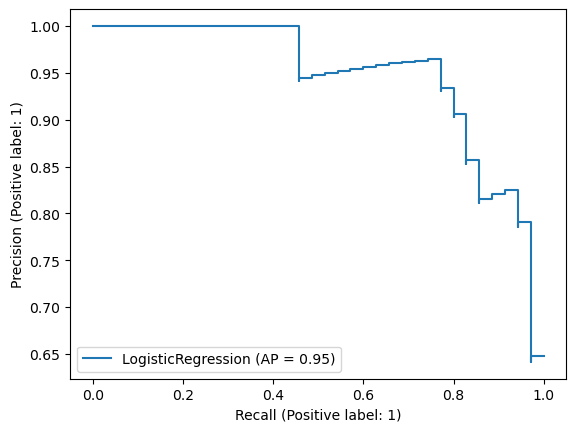

In [62]:
plot_precision_recall_curve(log_grid_model,scaled_X_test,y_test)

### ROC Curve

In [63]:
probs2 = log_grid_model.predict_proba(scaled_X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

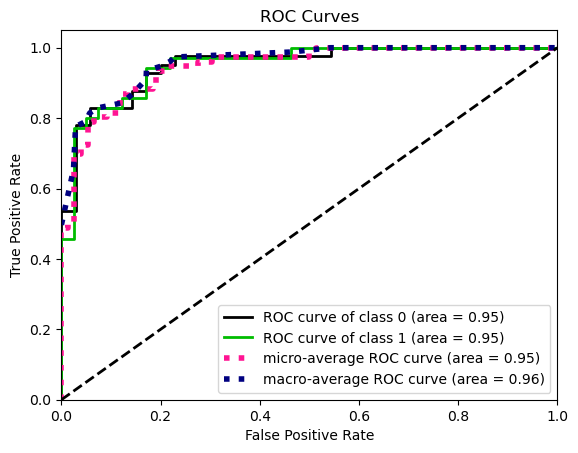

In [64]:
skplt.metrics.plot_roc_curve(y_test,probs2)

#### On comparing classification matrix for both models 
**LogisticRegressionCV** model is having 1 less incorrect predictions than **GridSearchCV** model
#### On comparing areas of the Precision-Recall curves and ROC curves
**Both** models are performing similar
#### On comparing accuracy score of both models,
**LogisticRegressionCV** model is performing well for our dataset

So,We use LogisticRegressionCV model for final task.

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [65]:
details = [ [54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ] ]

**Making prediction**

In [66]:
log_CV_model.predict(details)

array([0])

According to our classification model,that patient is not infected with heart disease.